Name: Gurjeet Singh

#**HW4 : Recurrent Neural Networks**
In this homework, we will explore how to develop a simple Recurrent Neural Network (RNN) for sentiment analysis. As a dataset, we will use the IMDB dataset. It contains the text of some reviews and the sentiment given by the authors of the reviews (positive review or negative review). The input to the RNN is the sequence of words that compose a review. The learning task consists in predicting the sentiment of the review.
In the first part, we will learn how to develop a simple RNN, then we will explore the differences in terms of computational load, number of parameters, and performances with respect to more advanced recurrent models, like LSTM and GRU. Subsequently, we experiment with the bi-directional model to unveil the strengths and the weaknesses of this technique. Finally, we will explore how to face overfitting by Dropout. 

##[TO COMPLETE] Exercise 4.1: Simple RNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

np.random.seed(42)

###Load dataset:
In this HW, we use the same datset used in the HW2, the IMDB dataset. The dataset contains 50,000 movie reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes. For convenience, the words are indexed by the overall frequency in the dataset, so that for example the integer "3" encodes the 3rd most frequent word in the data. For testing purposes, we will only consider the first 10,000  most common words.
By default, the load_data method returns a breakdown of the dataset into training and test sets. Both these sets contain 25,000 samples. To also have a validation set, we split the test set in half.

In [ ]:
num_words = 10000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
(X_valid, X_test) = X_test[:12500], X_test[12500:]
(y_valid, y_test) = y_test[:12500], y_test[12500:]

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Let's also get the word indexs (word to word-id)

In [ ]:
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


Now we create a reverse index (word-id to word) method. Moreover, we add three special word-ids to encode:
- the padding;
- the start of a sequence;
- a word that is not in the vocabulary of the first 10,000 most common words.

Moreover, we also add an "unknown" placeholder for all the other symbols (not words) that may occur.
*Please, notice that Keras does not use index 0, so we can shift the indices only by 3 positions.*

In [ ]:
reverse_index = {word_id + 3: word for word, word_id in word_index.items()}
reverse_index[0] = "<pad>" # padding
reverse_index[1] = "<sos>" # start of sequence
reverse_index[2] = "<oov>" # out-of-vocabulary
reverse_index[3] = "<unk>" # unknown

def decode_review(word_ids):
    return " ".join([reverse_index.get(word_id, "<err>") for word_id in word_ids])

Let's print a training sample and its target value

In [ ]:
decode_review(X_train[0])

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <oov> is an amazing actor and now the same being director <oov> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <oov> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <oov> to the two little boy's that played the <oov> of norman and paul they were just brilliant children are often left out of the <oov> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what

In [ ]:
y_train[0]

1

Because of a limit of Keras, to feed the input data into an RNN model we have to create sequences that have the same length. We use keras.preprocessing.sequence.pad_sequences() to preprocess X_train: this will create a 2D array of 25,000 rows (one per review) and maxlen=500 columns. Because of that, reviews longer than 500 words will be cut, while reviews shorter than 500 words will be padded with zeros.

In [ ]:
maxlen = 500
X_train_trim = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test_trim = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
X_valid_trim = keras.preprocessing.sequence.pad_sequences(X_valid, maxlen=maxlen)

###[TO COMPLETE] Define the model:
Let's define the model: 
- The first layer is an Embedding layer, with input_dim=num_words and output_dim=10. The model will gradually learn to represent each of the 10,000 words as a 10-dimensional vector. So the next layer will receive 3D batches of shape (batch size, 500, 10)
- The second layer is the recurrent one. In particular, in this case, we use a [SimpleRNN](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN) 
- The output layer is a Dense layer with a sigmoid activation function since this is a binary classification problem

[TO COMPLETE] In the following cell, we already inserted in the model the first Embedding layer. Add the recurrent layer (using 32 units), and the output layer. Select the right activation function for the output layer and motivate your choice. Finally, select the right loss function inserting the right value for the "loss" parameter in model.compile() and motivate your choice.
Please, insert your answers in a new text cell below this one, immediately before the code.

The output layers is made of one neuron unit since the problem that we are facing has a binary output. A sigmoid activation function has been used because we are dealing with a classification problem and to normalize the output as a probability distribution. The associated loss function of the RNN is the cross entropy function because is the best theoretical result that comes from the Maximum likelyhood estimation method when dealing with the sigmoid function.

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=num_words, output_dim=10))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
loss_cross = tf.keras.losses.BinaryCrossentropy()
model.compile(loss=loss_cross, optimizer="adam", metrics=["accuracy"])

Let's print a summary of the model. Specifically, note the number of parameters of the RNN layer.

In [28]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1376      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 101,409
Trainable params: 101,409
Non-trainable params: 0
_________________________________________________________________


###Train the model:
Now we have to train the model

In [29]:
history = model.fit(X_train_trim, y_train,
                    epochs=10, batch_size=128, validation_data=(X_valid_trim, y_valid))

Epoch 1/10
196/196 [==============================] - 28s 140ms/step - loss: 0.6942 - accuracy: 0.5177 - val_loss: 0.6526 - val_accuracy: 0.6222
Epoch 2/10
196/196 [==============================] - 27s 139ms/step - loss: 0.6523 - accuracy: 0.6491 - val_loss: 0.6321 - val_accuracy: 0.6342
Epoch 3/10
196/196 [==============================] - 27s 138ms/step - loss: 0.5294 - accuracy: 0.7565 - val_loss: 0.4808 - val_accuracy: 0.7859
Epoch 4/10
196/196 [==============================] - 27s 138ms/step - loss: 0.4512 - accuracy: 0.7928 - val_loss: 0.4494 - val_accuracy: 0.8018
Epoch 5/10
196/196 [==============================] - 27s 138ms/step - loss: 0.2550 - accuracy: 0.8977 - val_loss: 0.4788 - val_accuracy: 0.7910
Epoch 6/10
196/196 [==============================] - 27s 139ms/step - loss: 0.1435 - accuracy: 0.9548 - val_loss: 0.5250 - val_accuracy: 0.7932
Epoch 7/10
196/196 [==============================] - 27s 137ms/step - loss: 0.0771 - accuracy: 0.9809 - val_loss: 0.5686 - val_ac

Print the values of accuracy and the loss , and evaluate the model on the test set

391/391 - 10s - loss: 0.5809 - accuracy: 0.8429
accuracy: 84.29%


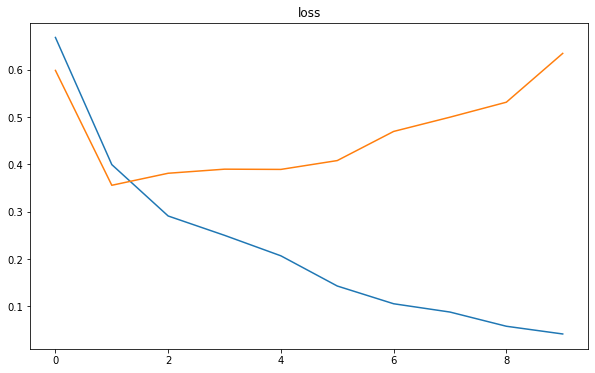

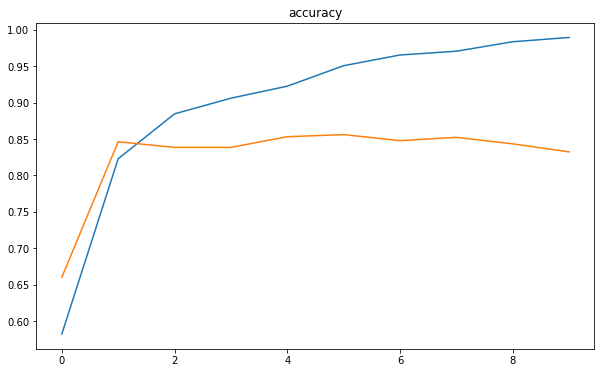

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test_trim, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

##[TO COMPLETE] Exercise 4.2: LSTM and GRU
**[TO COMPLETE]**: In this Exercise, you have to implement 2 models, similar to the previous one that, instead of exploiting the RNN layer, use an LSTM and a GRU Layer, respectively. For each model print the summary. Then, train it and plot the values of accuracy and loss. Finally, discuss the differences in terms of performance, the number of parameters, and training time. Note that you can use a different number of units than the one used in the RNN example.

**[TO COMPLETE]**: In order to perform a fair comparison (definition of fair: models have to use more or less the same number of parameters) between the given RNN model and the other 2 models (LSTM and GRU), how many units do they have to use, respectively?

*insert cells (code and text) with results and discussion immediately after this cell*

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 14)                1400      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 15        
Total params: 101,415
Trainable params: 101,415
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 52s 254ms/step - loss: 0.6402 - accuracy: 0.6083 - val_loss: 0.4509 - val_accuracy: 0.7970
Epoch 2/10
196/196 [==============================] - 51s 261ms/step - loss: 0.3513 - accuracy: 0.8656 - val_loss: 0.3382 - val_accuracy: 0.8630
Epoch 3/10
196/196 [==============================] - 51s 259ms/step - loss: 0.255

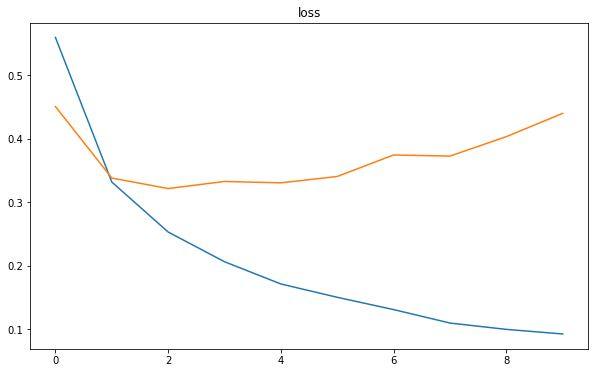

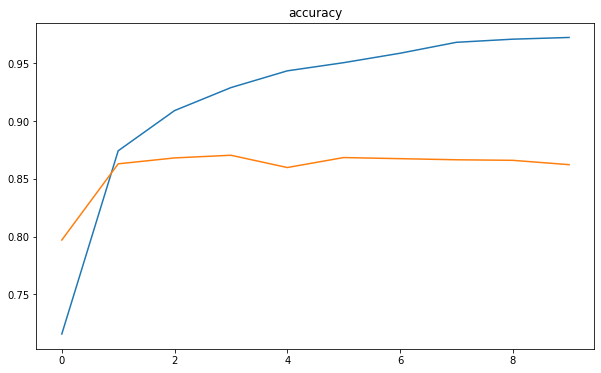

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=num_words, output_dim=10))
model.add(tf.keras.layers.LSTM(units=14))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
loss_cross = tf.keras.losses.BinaryCrossentropy()
model.compile(loss=loss_cross, optimizer="adam", metrics=["accuracy"])

print(model.summary())

history = model.fit(X_train_trim, y_train,
                    epochs=10, batch_size=128, validation_data=(X_valid_trim, y_valid))
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test_trim, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
gru_7 (GRU)                  (None, 16)                1344      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 101,361
Trainable params: 101,361
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
196/196 [==============================] - 51s 250ms/step - loss: 0.6574 - accuracy: 0.5887 - val_loss: 0.4049 - val_accuracy: 0.8213
Epoch 2/10
196/196 [==============================] - 51s 260ms/step - loss: 0.3142 - accuracy: 0.8735 - val_loss: 0.3225 - val_accuracy: 0.8673
Epoch 3/10
196/196 [==============================] - 51s 258ms/step - loss: 0.223

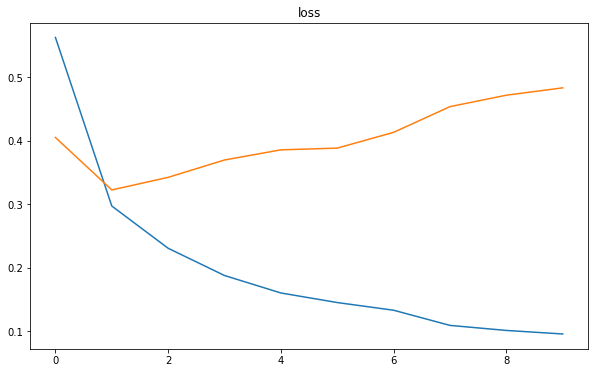

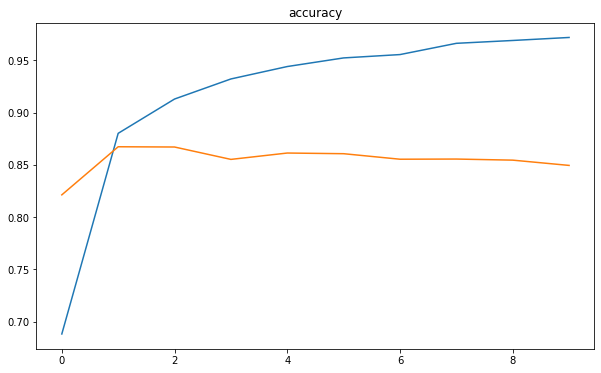

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=num_words, output_dim=10))
model.add(tf.keras.layers.GRU(units=16))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))
loss_cross = tf.keras.losses.BinaryCrossentropy()
model.compile(loss=loss_cross, optimizer="adam", metrics=["accuracy"])
print(model.summary())


history = model.fit(X_train_trim, y_train,
                    epochs=10, batch_size=128, validation_data=(X_valid_trim, y_valid))
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test_trim, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In order to compare all the three Recurrent Neural Network models we need  to define the number of units such that they have the same amount of parameters.
For the LSTM model we need just 14 units instead for GRU 16 units.
Defining more number of units for both models will increase the complexity of the model resulting in very strong overfitting issues and comparison would not be possibile with different parameters if we want to compare all the techniques with the same measure of complexity.

In the LSTM we need less units than GRU because the latter one uses the **same gate** for update and reset tasks, this change results in having a less complex model, therefore less parameters.

Both last models perform almost the same performance in terms of accuracy, loss minimization and time, although the LSTM does show more overfitting issues and slightly more learning time than GRU, but this is an expected behaviour since it's a complexer model than GRU.
On the contrary if we compare both models with the **Simple RNN** we see much difference in accuracy and loss minimization. LSTM and GRU result to improve much in accuracy and loss minimization comparing the Simple RNN. But it has to note also that the learning/training time increseases a lot for LSTM and GRU models, they require double of the time comparing to Simple RNN.

Finally we note that LSTM and GRU need much **less units** leading into a **smaller output space** than the Simple RNN.

Last and not least, to improve more our results regularized methods have to be introduce to solve overfitting issues and this task will be done in the next sections

##Bidirectional LSTM
Let's modify the previous code by using a bidirectional LSTM instead of a simple LSTM. In Keras, it is possible to define a bidirectional layer by using [tf.keras.layers.Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional). Note that this wrapper requires as argument a layer, in our case we use [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)


In [ ]:
model_bidirectional = keras.models.Sequential()
model_bidirectional.add(keras.layers.Embedding(input_dim=num_words, output_dim=10))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(32)))
model_bidirectional.add(keras.layers.Dense(1, activation="sigmoid"))

model_bidirectional.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_bidirectional.summary()

history = model_bidirectional.fit(X_train_trim, y_train,
                    epochs=5, batch_size=128, validation_data=(X_valid_trim, y_valid))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 10)          100000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                11008     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 111,073
Trainable params: 111,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
196/196 [==============================] - 117s 580ms/step - loss: 0.6470 - accuracy: 0.6161 - val_loss: 0.4062 - val_accuracy: 0.8320
Epoch 2/5
196/196 [==============================] - 111s 568ms/step - loss: 0.3631 - accuracy: 0.8570 - val_loss: 0.3639 - val_accuracy: 0.8481
Epoch 3/5
196/196 [==============================] - 113s 577ms/step - loss: 0.2538 - a

391/391 - 19s - loss: 0.3176 - accuracy: 0.8745
accuracy: 87.45%


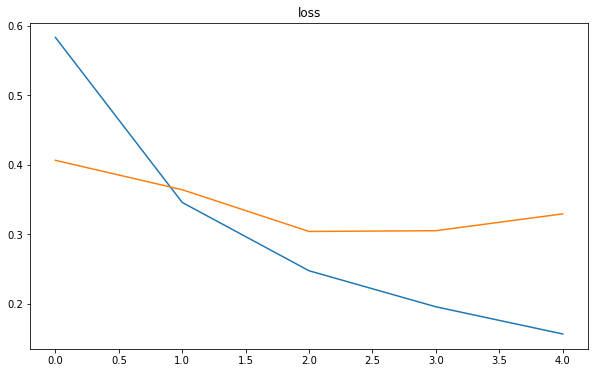

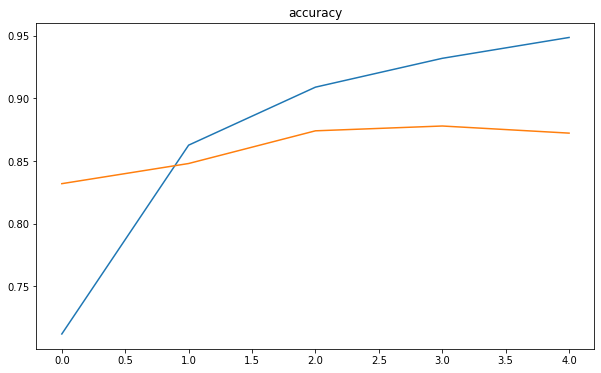

In [ ]:
plot_loss(history)

plot_accuracy(history)

scores = model_bidirectional.evaluate(X_test_trim, y_test, verbose=2)
print("%s: %.2f%%" % (model_bidirectional.metrics_names[1], scores[1]*100))

##[TO COMPLETE] Exercise 4.3: Dropout
In the bi-directional model is it possible to notice that the model overfits the training data.
A possible solution to this problem could be applying the dropout technique to input or output layers.

In Keras, to apply dropout you have to add a [keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer.

**[TO COMPLETE]**: modify the code of the previous exercise adding the Dropout to the input and/or output layers. Find the Dropout probability that reduces the overfitting issue.

**[TO COMPLETE]** Is it possible to modify the values of some other hyper-parameters to mitigate overfitting? And if this is the case, explain why and perform an experimental study demonstrating your point.

*insert cells (code and text) with results and discussion immediately after this cell*

In [24]:
model_bidirectional = keras.models.Sequential()
model_bidirectional.add(keras.layers.Embedding(input_dim=num_words, output_dim=10))
model_bidirectional.add(tf.keras.layers.Dropout(.8))
model_bidirectional.add(keras.layers.Bidirectional(keras.layers.LSTM(14)))#
model_bidirectional.add(keras.layers.Dense(1, activation="sigmoid"))

model_bidirectional.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_bidirectional.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 10)          0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 28)                2800      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 29        
Total params: 102,829
Trainable params: 102,829
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history = model_bidirectional.fit(X_train_trim, y_train,
                    epochs=5, batch_size=128, validation_data=(X_valid_trim, y_valid))

Epoch 1/5
196/196 [==============================] - 79s 385ms/step - loss: 0.6775 - accuracy: 0.5454 - val_loss: 0.4700 - val_accuracy: 0.8031
Epoch 2/5
196/196 [==============================] - 77s 392ms/step - loss: 0.4421 - accuracy: 0.8073 - val_loss: 0.3217 - val_accuracy: 0.8685
Epoch 3/5
196/196 [==============================] - 79s 403ms/step - loss: 0.3195 - accuracy: 0.8697 - val_loss: 0.3060 - val_accuracy: 0.8720
Epoch 4/5
196/196 [==============================] - 79s 406ms/step - loss: 0.2795 - accuracy: 0.8876 - val_loss: 0.3003 - val_accuracy: 0.8762
Epoch 5/5
196/196 [==============================] - 80s 407ms/step - loss: 0.2699 - accuracy: 0.8913 - val_loss: 0.2793 - val_accuracy: 0.8849


391/391 - 15s - loss: 0.2701 - accuracy: 0.8918
accuracy: 89.18%


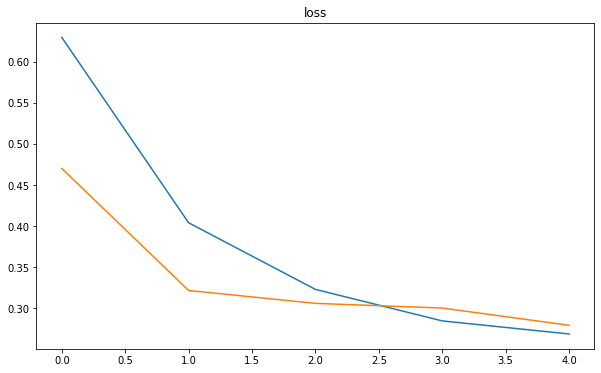

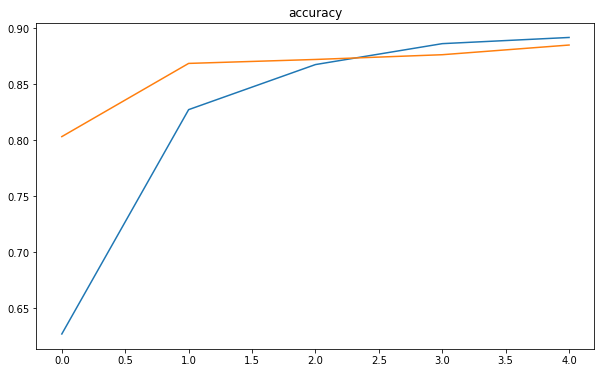

In [26]:
plot_loss(history)

plot_accuracy(history)

scores = model_bidirectional.evaluate(X_test_trim, y_test, verbose=2)
print("%s: %.2f%%" % (model_bidirectional.metrics_names[1], scores[1]*100))

|                                                      | Epoch | Tr. Loss | Val. Loss | Tr. accuracy | Val. accuracy | Test Loss | Test accuracy | Model parameters |
|------------------------------------------------------|-------|----------|-----------|--------------|---------------|-----------|---------------|------------------|
| Given Model (Baseline)                               | 5     | 0.1534   | 0.3292    | 0.9507       | 0.8723        | 0.3176    | 0.8745        | 111,073          |
| Model 1 - Drop out 0.2, Bidir. LSTM 32               | 5     | 0.1801   | 0.3674    | 0.9369       | 0.8701        | 0.3455    | 0.8741        | 111,073          |
| Model 2 - Bidir. LSTM 32, Drop out 0.2               | 5     | 0.1318   | 0.3626    | 0.9570       | 0.8572        | 0.3536    | 0.8601        | 111,073          |
| Model 3 - Bidir. LSTM 12, Drop out 0.2               | 5     | 0.1991   | 0.3282    | 0.9352       | 0.8686        | 0.3146    | 0.8770        | 102,233          |
| Model 4 - Drop out 0.2, Bidir. LSTM 12, Drop out 0.2 | 5     | 0.1772   | 0.3053    | 0.9424       | 0.8757        | 0.2983    | 0.8791        | 102,233          |
| Model 5 - Drop out 0.5, Bidir. LSTM 12               | 5     | 0.2155   | 0.2969    | 0.9206       | 0.8778        | 0.2873    | 0.8834        | 102,233          |
| Model 6 - Drop out 0.8, Bidir. LSTM 12               | 5     | 0.2936   | 0.3022    | 0.8807       | 0.8762        | 0.2880    | 0.8793        | 102,233          |
| Model 7 - Drop out 0.8, Bidir. LSTM 14               | 5     | 0.2699   | 0.2793    | 0.8913       | 0.8849        | 0.2701    | 0.8918        | 102,829          |

From the above results we can  see that the given baseline model presents a strong evidence of overfitting, due to the high complexity of model and traning biased learning. 
In order to assess the best model, hyperparameters have been changed such that the validation loss and the difference between training and validation losses are minimized.


Following this procedure we lead in to a reliable model with a suitable and expected accuracy in the test set which would respect our analysis of the validation set.


In the beginning as suggested we can try the drop out technique in order to overcome this problem, hence the first models were tested by placing the dropout rate in different layers.
After testing different combination of drop out layers and  rate values, we can see that the RNN does perform better if we place the drop-out layer only in the input layer, indeed we can prove it by also following the Recurrent Neural Network Regularization paper of Zaremba: “By not using dropout on the recurrent connections, the LSTM can benefit from dropout regularization without sacrificing its valuable memorization ability.” (Zaremba et al.,2014).


Although this technique allowed to improve some performances the overfitting issue was still very present, caused by the high number of units of the Bidirection LSTM, which were giving a high complex model. Hence a decrease of unit number in the LSTM leaded to improve the gap between training and validation metrics.
Finally an increased rate of the dropout rate in the input layer resulted to enhance the results leading to the best reliable and minimized loss (training-validation) model.
Note that the 5 epochs were enough to describe all the results.
The final model (7) is then reported below.

|                                                      | Epoch | Tr. Loss | Val. Loss | Tr. accuracy | Val. accuracy | Test Loss | Test accuracy | Model parameters |
|------------------------------------------------------|-------|----------|-----------|--------------|---------------|-----------|---------------|------------------|
| Model 7 - Drop out 0.8, Bidir. LSTM 14               | 5     | 0.2699   | 0.2793    | 0.8913       | 0.8849        | 0.2701    | 0.8918        | 102,829          |